In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
class QLearning:

    def __init__(self, num_servers, action_space, learning_rate=0.1, discount_factor=0.9, initial_exploration_proba=1.0, exploration_decay=0.95):
        self.num_servers = num_servers
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_proba = initial_exploration_proba
        self.exploration_decay = exploration_decay

        # Initialize Q-table with random values between 0 and 1
        self.q_table = np.random.rand(2, len(action_space))

    def convert_state(self, queue_length):
        return int(queue_length > 5)

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.exploration_proba:
            # Explore: randomly choose an action
            return np.random.choice(self.action_space)
        else:
            # Exploit: choose the action with the highest Q-value
            return np.argmax(self.q_table[state, :])

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.max(self.q_table[next_state, :])
        self.q_table[state, action] = (1 - self.learning_rate) * self.q_table[state, action] + \
                                      self.learning_rate * (reward + self.discount_factor * best_next_action)

        # Decay exploration rate
        self.exploration_proba *= self.exploration_decay
        self.exploration_proba = max(0.1, self.exploration_proba)  # Ensure exploration rate doesn't go below 0.1

In [137]:
def simulate_q_learning(num_episodes):
    num_servers = 15
    action_space = list(range(5, 16))
    ql_agent = QLearning(num_servers, action_space)

    queue_length_over_time = []
    action_over_time = []

    for episode in range(num_episodes):
        # Reset the environment at the beginning of each episode
#         queue_length = np.random.poisson(10)
        queue_length = 0 

#         # Ensure initial queue length is within the desired range [0, 10]
#         queue_length = min(max(queue_length, 0), 10)

        print(f"Initial queue length: {queue_length}")

        time_step = 0
        queue_episode = []
        action_episode = []
        
        
        while time_step < 20:  
            # Convert the queue length to a binary state
            
            new_arrivals = np.random.poisson(5)
            queue_length = max(queue_length + new_arrivals, 0)
            
            
            state = ql_agent.convert_state(queue_length)

            print('time step: ',time_step)
            print('queue_length: ', queue_length)
            
            # Choose action based on Q-learning policy
            action = ql_agent.choose_action(state)
            print('action ', action)
            
            
            # Simulate server processing time
            server_rate = action
#             if server_rate > 0:
#                 processing_time = np.random.exponential(1 / server_rate)
#             else:
#                 processing_time = 0  # Set processing time to 0 if the server rate is 0

            # Update queue length based on server processing and new arrivals
            
            queue_length = max(queue_length + new_arrivals - action, 0)

            
            # Calculate reward
            reward = 100 if queue_length <= 10 else -100
#             total_reward += reward
            

            
            print('reward ', reward)
            print('')
    
            # Store queue length for plotting
            queue_episode.append(queue_length)
            action_episode.append(action)

            # Convert the next queue length to a binary state
            next_state = ql_agent.convert_state(queue_length)

            # Update Q-table
            ql_agent.update_q_table(state, action - 5, reward, next_state)

            print(f"Queue length after processing: {queue_length}")

            time_step += 1

        queue_length_over_time.append(queue_episode)
        action_over_time.append(action_episode)

    return queue_length_over_time, action_over_time


In [138]:
# Example usage:
num_servers = 15
action_space = list(range(5, 16))
ql_agent = QLearning(num_servers, action_space)

# Print the initial Q-table with random values
print("Initial Q-table:")
print(ql_agent.q_table)

Initial Q-table:
[[0.85016968 0.06972148 0.83149483 0.12714189 0.93344878 0.16503407
  0.32502202 0.17816397 0.23663656 0.61193467 0.18415433]
 [0.19506653 0.05164833 0.20837591 0.8923677  0.44411052 0.38358726
  0.12864106 0.3679167  0.27885806 0.95559575 0.338089  ]]


In [139]:
# Example usage:
num_episodes = 1
queue_length_over_time, action_over_time = simulate_q_learning(num_episodes)

Initial queue length: 0
time step:  0
queue_length:  8
action  10
reward  100

Queue length after processing: 6
time step:  1
queue_length:  13
action  13
reward  100

Queue length after processing: 7
time step:  2
queue_length:  14
action  6
reward  -100

Queue length after processing: 15
time step:  3
queue_length:  17
action  10
reward  100

Queue length after processing: 9
time step:  4
queue_length:  18
action  6
reward  -100

Queue length after processing: 21
time step:  5
queue_length:  31
action  5
reward  -100

Queue length after processing: 36
time step:  6
queue_length:  42
action  7
reward  -100

Queue length after processing: 41
time step:  7
queue_length:  50
action  8
reward  -100

Queue length after processing: 51
time step:  8
queue_length:  53
action  13
reward  -100

Queue length after processing: 42
time step:  9
queue_length:  44
action  8
reward  -100

Queue length after processing: 38
time step:  10
queue_length:  41
action  8
reward  -100

Queue length after pro

In [140]:
def plot_queue_length_over_time(queue_length_over_time):
    plt.figure(figsize=(10, 6))

    for i in range(len(queue_length_over_time)):
        plt.plot(queue_length_over_time[i], label=f'Episode {i + 1}', alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Queue Length')
    plt.title('Queue Length over Time')
    plt.legend()

    plt.show()

    
def plot_action_over_time(action_over_time):
    plt.figure(figsize=(10, 6))

    for i in range(len(action_over_time)):
        plt.plot(action_over_time[i], label=f'Episode {i + 1}', alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Action')
    plt.title('Action over Time')
    plt.legend()

    plt.show()

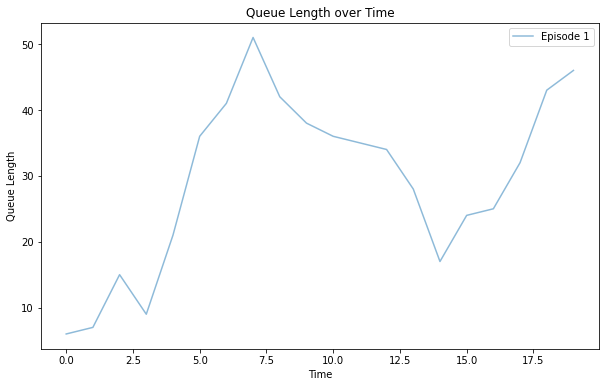

In [141]:
# Plot the queue length over time
plot_queue_length_over_time(queue_length_over_time)

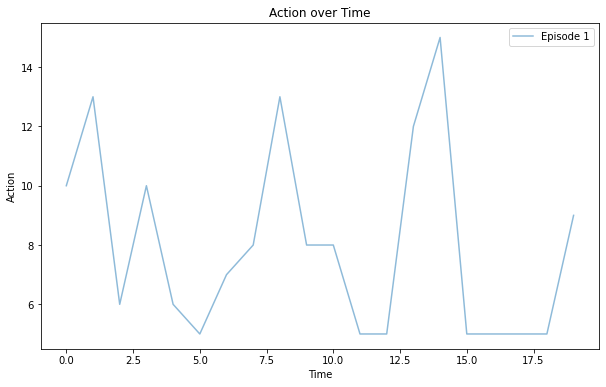

In [142]:
# Plot the queue length over time
plot_action_over_time(action_over_time)